In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler
import numpy as np
import shap #Check version, SHAP 0.36.0
import time
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, InputLayer, GRU, Bidirectional
from sklearn.ensemble import IsolationForest
from keras.preprocessing.sequence import TimeseriesGenerator

In [2]:
from numpy.random import seed
seed(1)
tf.random.set_seed(2)

In [3]:
df_predict = pd.read_csv(r"C:/Users/Nicklas Branding/Desktop/infection_per_sweden_on_covid19.csv",encoding="latin-1")

In [4]:
df_predict.head()

,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
0,2020,6,1,0,0,1,0,0,0,0,0,0,0
1,2020,7,0,0,0,1,0,0,0,0,0,0,0
2,2020,8,0,0,0,1,0,0,0,0,0,0,0
3,2020,9,13,0,0,14,0,0,0,0,0,0,0
4,2020,10,211,2,2,225,2,3,3,0,0,0,0


In [5]:
df_predict = df_predict.drop(['Antal_fall_100000inv_vecka', 'Antal_fall_100000inv_14dagar', 'Kum_antal_fall', 'Kum_fall_100000inv', 'Antal_nyaintensivvårdade_vecka', 'Kum_antal_intensivvårdade', 'Antal_avlidna_vecka', 'Antal_avlidna_milj_inv_vecka', 'Kum_antal_avlidna', 'Kum_antal_avlidna_milj_inv','veckonummer','år'],axis=1)

In [6]:
feature = ['Antal_fall_vecka']

In [7]:
dfX_predict = df_predict[feature]

In [8]:
dfX_predict.shape

(101, 1)

In [9]:
mu = df_predict.mean(0)
sd = df_predict.std(0)
df_norm = (df_predict - mu) / sd
df_norm.head(3)
Y_mu_2 = np.asarray(mu[feature])
Y_sd_2 = np.asarray(sd[feature])

In [10]:
df_norm = np.asarray(df_norm)
df_norm.reshape((-1,1))

array([[-0.80600237],
       [-0.80605767],
       [-0.80605767],
       [-0.80533875],
       [-0.79438912],
       [-0.7597153 ],
       [-0.7549594 ],
       [-0.6978333 ],
       [-0.62749022],
       [-0.59923133],
       [-0.59856771],
       [-0.57362689],
       [-0.59414362],
       [-0.57639195],
       [-0.59209748],
       [-0.60371072],
       [-0.5693687 ],
       [-0.47308938],
       [-0.4121475 ],
       [-0.41491256],
       [-0.39378752],
       [-0.569424  ],
       [-0.68555644],
       [-0.71635919],
       [-0.73328134],
       [-0.72000906],
       [-0.69468113],
       [-0.69257969],
       [-0.71276461],
       [-0.73969628],
       [-0.73239652],
       [-0.71801822],
       [-0.69103125],
       [-0.64463358],
       [-0.60465084],
       [-0.5694793 ],
       [-0.49526515],
       [-0.29977554],
       [ 0.21557597],
       [ 0.59886831],
       [ 0.92591937],
       [ 0.9604826 ],
       [ 1.1604516 ],
       [ 1.23107118],
       [ 1.60678726],
       [ 1

In [11]:
training_data = df_norm[0:61]
testing_data_38 = df_norm[61:101]


In [12]:
look_back=2
train_genertor = TimeseriesGenerator(training_data,training_data,length=look_back,batch_size=1)
test_genertor_38 = TimeseriesGenerator(testing_data_38,testing_data_38,length=look_back,batch_size=1)
print("samples", len(train_genertor))

samples 59


In [14]:
X_test_1_sample = test_genertor_38[0]
Y_test_1_sample = testing_data_38[0:1]

X_test_2_sample = test_genertor_38[1]
Y_test_2_sample = testing_data_38[1:2]

X_test_3_sample = test_genertor_38[2]
Y_test_3_sample = testing_data_38[2:3]

X_test_4_sample = test_genertor_38[3]
Y_test_4_sample = testing_data_38[3:4]

X_test_5_sample = test_genertor_38[4]
Y_test_5_sample = testing_data_38[4:5]

X_test_6_sample = test_genertor_38[5]
Y_test_6_sample = testing_data_38[5:6]

X_test_7_sample = test_genertor_38[6]
Y_test_7_sample = testing_data_38[6:7]

X_test_8_sample = test_genertor_38[7]
Y_test_8_sample = testing_data_38[7:8]

X_test_9_sample = test_genertor_38[8]
Y_test_9_sample = testing_data_38[8:9]

X_test_10_sample = test_genertor_38[9]
Y_test_10_sample = testing_data_38[9:10]

X_test_11_sample = test_genertor_38[10]
Y_test_11_sample = testing_data_38[10:11]

X_test_12_sample = test_genertor_38[11]
Y_test_12_sample = testing_data_38[11:12]

X_test_13_sample = test_genertor_38[12]
Y_test_13_sample = testing_data_38[12:13]

X_test_14_sample = test_genertor_38[13]
Y_test_14_sample = testing_data_38[13:14]

X_test_15_sample = test_genertor_38[14]
Y_test_15_sample = testing_data_38[14:15]

X_test_16_sample = test_genertor_38[15]
Y_test_16_sample = testing_data_38[15:16]

X_test_17_sample = test_genertor_38[16]
Y_test_17_sample = testing_data_38[16:17]

X_test_18_sample = test_genertor_38[17]
Y_test_18_sample = testing_data_38[17:18]

X_test_19_sample = test_genertor_38[18]
Y_test_19_sample = testing_data_38[18:19]

X_test_20_sample = test_genertor_38[19]
Y_test_20_sample = testing_data_38[19:20]

X_test_21_sample = test_genertor_38[20]
Y_test_21_sample = testing_data_38[20:21]

X_test_22_sample = test_genertor_38[21]
Y_test_22_sample = testing_data_38[21:22]

X_test_23_sample = test_genertor_38[22]
Y_test_23_sample = testing_data_38[22:23]

X_test_24_sample = test_genertor_38[23]
Y_test_24_sample = testing_data_38[23:24]

X_test_25_sample = test_genertor_38[24]
Y_test_25_sample = testing_data_38[24:25]

X_test_26_sample = test_genertor_38[25]
Y_test_26_sample = testing_data_38[25:26]

X_test_27_sample = test_genertor_38[26]
Y_test_27_sample = testing_data_38[26:27]

X_test_28_sample = test_genertor_38[27]
Y_test_28_sample = testing_data_38[27:28]

X_test_29_sample = test_genertor_38[28]
Y_test_29_sample = testing_data_38[28:29]

X_test_30_sample = test_genertor_38[29]
Y_test_30_sample = testing_data_38[29:30]

X_test_31_sample = test_genertor_38[30]
Y_test_31_sample = testing_data_38[30:31]

X_test_32_sample = test_genertor_38[31]
Y_test_32_sample = testing_data_38[31:32]

X_test_33_sample = test_genertor_38[32]
Y_test_33_sample = testing_data_38[32:33]

X_test_34_sample = test_genertor_38[33]
Y_test_34_sample = testing_data_38[33:34]

X_test_35_sample = test_genertor_38[34]
Y_test_35_sample = testing_data_38[34:35]

X_test_36_sample = test_genertor_38[35]
Y_test_36_sample = testing_data_38[35:36]

X_test_37_sample = test_genertor_38[36]
Y_test_37_sample = testing_data_38[36:37]

X_test_38_sample = test_genertor_38[37]
Y_test_38_sample = testing_data_38[37:38]

In [123]:
BI_LSTM = Sequential()
BI_LSTM.add(Bidirectional(LSTM(256,activation="relu", return_sequences=True),input_shape=(look_back,1)))
BI_LSTM.add(Bidirectional(LSTM(256,activation="relu",return_sequences=False)))
BI_LSTM.add(Dense(1))
BI_LSTM.compile(optimizer = keras.optimizers.Adam(learning_rate=0.0001), loss = 'mean_absolute_error')
BI_LSTM.fit(train_genertor,  steps_per_epoch = 1,epochs = 900, verbose=1)

Epoch 1/900
1/1 [==============================] - 8s 8s/step - loss: 0.7186
Epoch 2/900
1/1 [==============================] - 0s 22ms/step - loss: 0.6279
Epoch 3/900
1/1 [==============================] - 0s 19ms/step - loss: 0.3921
Epoch 4/900
1/1 [==============================] - 0s 17ms/step - loss: 0.6405
Epoch 5/900
1/1 [==============================] - 0s 17ms/step - loss: 0.7334
Epoch 6/900
1/1 [==============================] - 0s 17ms/step - loss: 0.9672
Epoch 7/900
1/1 [==============================] - 0s 18ms/step - loss: 0.7786
Epoch 8/900
1/1 [==============================] - 0s 20ms/step - loss: 0.7772
Epoch 9/900
1/1 [==============================] - 0s 24ms/step - loss: 0.5652
Epoch 10/900
1/1 [==============================] - 0s 28ms/step - loss: 0.4045
Epoch 11/900
1/1 [==============================] - 0s 23ms/step - loss: 1.0203
Epoch 12/900
1/1 [==============================] - 0s 20ms/step - loss: 0.6725
Epoch 13/900
1/1 [==============================] -

1/1 [==============================] - 0s 18ms/step - loss: 1.1198
Epoch 104/900
1/1 [==============================] - 0s 18ms/step - loss: 0.8087
Epoch 105/900
1/1 [==============================] - 0s 18ms/step - loss: 0.4322
Epoch 106/900
1/1 [==============================] - 0s 19ms/step - loss: 0.3770
Epoch 107/900
1/1 [==============================] - 0s 20ms/step - loss: 0.3676
Epoch 108/900
1/1 [==============================] - 0s 19ms/step - loss: 0.2759
Epoch 109/900
1/1 [==============================] - 0s 18ms/step - loss: 0.4624
Epoch 110/900
1/1 [==============================] - 0s 18ms/step - loss: 0.2222
Epoch 111/900
1/1 [==============================] - 0s 18ms/step - loss: 0.5286
Epoch 112/900
1/1 [==============================] - 0s 18ms/step - loss: 0.3880
Epoch 113/900
1/1 [==============================] - 0s 18ms/step - loss: 0.4834
Epoch 114/900
1/1 [==============================] - 0s 20ms/step - loss: 0.5080
Epoch 115/900
1/1 [=======================

1/1 [==============================] - 0s 18ms/step - loss: 0.1013
Epoch 205/900
1/1 [==============================] - 0s 16ms/step - loss: 0.0834
Epoch 206/900
1/1 [==============================] - 0s 16ms/step - loss: 0.3945
Epoch 207/900
1/1 [==============================] - 0s 16ms/step - loss: 0.7162
Epoch 208/900
1/1 [==============================] - 0s 16ms/step - loss: 0.0342
Epoch 209/900
1/1 [==============================] - 0s 16ms/step - loss: 0.0403
Epoch 210/900
1/1 [==============================] - 0s 17ms/step - loss: 0.2018
Epoch 211/900
1/1 [==============================] - 0s 16ms/step - loss: 0.0348
Epoch 212/900
1/1 [==============================] - 0s 19ms/step - loss: 0.3731
Epoch 213/900
1/1 [==============================] - 0s 16ms/step - loss: 0.1239
Epoch 214/900
1/1 [==============================] - 0s 17ms/step - loss: 0.0028
Epoch 215/900
1/1 [==============================] - 0s 16ms/step - loss: 0.1633
Epoch 216/900
1/1 [=======================

1/1 [==============================] - 0s 23ms/step - loss: 0.0504
Epoch 306/900
1/1 [==============================] - 0s 20ms/step - loss: 0.0952
Epoch 307/900
1/1 [==============================] - 0s 22ms/step - loss: 0.2680
Epoch 308/900
1/1 [==============================] - 0s 19ms/step - loss: 0.1401
Epoch 309/900
1/1 [==============================] - 0s 23ms/step - loss: 0.0227
Epoch 310/900
1/1 [==============================] - 0s 20ms/step - loss: 0.1827
Epoch 311/900
1/1 [==============================] - 0s 19ms/step - loss: 0.1042
Epoch 312/900
1/1 [==============================] - 0s 20ms/step - loss: 0.0266
Epoch 313/900
1/1 [==============================] - 0s 19ms/step - loss: 0.4640
Epoch 314/900
1/1 [==============================] - 0s 18ms/step - loss: 0.0928
Epoch 315/900
1/1 [==============================] - 0s 17ms/step - loss: 0.0356
Epoch 316/900
1/1 [==============================] - 0s 17ms/step - loss: 0.0195
Epoch 317/900
1/1 [=======================

1/1 [==============================] - 0s 17ms/step - loss: 0.0252
Epoch 407/900
1/1 [==============================] - 0s 16ms/step - loss: 0.0569
Epoch 408/900
1/1 [==============================] - 0s 18ms/step - loss: 0.0858
Epoch 409/900
1/1 [==============================] - 0s 18ms/step - loss: 0.0014
Epoch 410/900
1/1 [==============================] - 0s 19ms/step - loss: 0.2021
Epoch 411/900
1/1 [==============================] - 0s 19ms/step - loss: 0.0553
Epoch 412/900
1/1 [==============================] - 0s 18ms/step - loss: 0.1982
Epoch 413/900
1/1 [==============================] - 0s 18ms/step - loss: 0.0723
Epoch 414/900
1/1 [==============================] - 0s 17ms/step - loss: 0.0634
Epoch 415/900
1/1 [==============================] - 0s 22ms/step - loss: 0.4688
Epoch 416/900
1/1 [==============================] - 0s 18ms/step - loss: 0.1018
Epoch 417/900
1/1 [==============================] - 0s 17ms/step - loss: 0.0217
Epoch 418/900
1/1 [=======================

1/1 [==============================] - 0s 16ms/step - loss: 0.3116
Epoch 508/900
1/1 [==============================] - 0s 16ms/step - loss: 0.0717
Epoch 509/900
1/1 [==============================] - 0s 16ms/step - loss: 0.1718
Epoch 510/900
1/1 [==============================] - 0s 15ms/step - loss: 0.0270
Epoch 511/900
1/1 [==============================] - 0s 16ms/step - loss: 5.3954e-04
Epoch 512/900
1/1 [==============================] - 0s 16ms/step - loss: 0.7280
Epoch 513/900
1/1 [==============================] - 0s 16ms/step - loss: 0.0351
Epoch 514/900
1/1 [==============================] - 0s 16ms/step - loss: 0.0042
Epoch 515/900
1/1 [==============================] - 0s 17ms/step - loss: 0.0156
Epoch 516/900
1/1 [==============================] - 0s 16ms/step - loss: 0.0944
Epoch 517/900
1/1 [==============================] - 0s 16ms/step - loss: 0.4773
Epoch 518/900
1/1 [==============================] - 0s 16ms/step - loss: 0.0323
Epoch 519/900
1/1 [===================

1/1 [==============================] - 0s 15ms/step - loss: 0.5723
Epoch 609/900
1/1 [==============================] - 0s 15ms/step - loss: 0.0257
Epoch 610/900
1/1 [==============================] - 0s 16ms/step - loss: 0.0178
Epoch 611/900
1/1 [==============================] - 0s 15ms/step - loss: 0.0209
Epoch 612/900
1/1 [==============================] - 0s 16ms/step - loss: 0.0554
Epoch 613/900
1/1 [==============================] - 0s 17ms/step - loss: 5.2100e-04
Epoch 614/900
1/1 [==============================] - 0s 16ms/step - loss: 0.0425
Epoch 615/900
1/1 [==============================] - 0s 16ms/step - loss: 0.0195
Epoch 616/900
1/1 [==============================] - 0s 16ms/step - loss: 0.1917
Epoch 617/900
1/1 [==============================] - 0s 17ms/step - loss: 0.0611
Epoch 618/900
1/1 [==============================] - 0s 17ms/step - loss: 0.0448
Epoch 619/900
1/1 [==============================] - 0s 16ms/step - loss: 0.3425
Epoch 620/900
1/1 [===================

1/1 [==============================] - 0s 16ms/step - loss: 0.1401
Epoch 710/900
1/1 [==============================] - 0s 17ms/step - loss: 0.0526
Epoch 711/900
1/1 [==============================] - 0s 15ms/step - loss: 0.2084
Epoch 712/900
1/1 [==============================] - 0s 19ms/step - loss: 0.0696
Epoch 713/900
1/1 [==============================] - 0s 25ms/step - loss: 0.0159
Epoch 714/900
1/1 [==============================] - 0s 21ms/step - loss: 0.1038
Epoch 715/900
1/1 [==============================] - 0s 20ms/step - loss: 0.1437
Epoch 716/900
1/1 [==============================] - 0s 22ms/step - loss: 0.2952
Epoch 717/900
1/1 [==============================] - 0s 19ms/step - loss: 0.7689
Epoch 718/900
1/1 [==============================] - 0s 20ms/step - loss: 0.0081
Epoch 719/900
1/1 [==============================] - 0s 22ms/step - loss: 0.2955
Epoch 720/900
1/1 [==============================] - 0s 21ms/step - loss: 0.0517
Epoch 721/900
1/1 [=======================

1/1 [==============================] - 0s 20ms/step - loss: 0.0792
Epoch 811/900
1/1 [==============================] - 0s 20ms/step - loss: 0.2694
Epoch 812/900
1/1 [==============================] - 0s 19ms/step - loss: 0.1042
Epoch 813/900
1/1 [==============================] - 0s 16ms/step - loss: 0.1160
Epoch 814/900
1/1 [==============================] - 0s 15ms/step - loss: 0.0496
Epoch 815/900
1/1 [==============================] - 0s 16ms/step - loss: 0.0632
Epoch 816/900
1/1 [==============================] - 0s 16ms/step - loss: 0.0564
Epoch 817/900
1/1 [==============================] - 0s 15ms/step - loss: 0.0271
Epoch 818/900
1/1 [==============================] - 0s 17ms/step - loss: 0.0486
Epoch 819/900
1/1 [==============================] - 0s 16ms/step - loss: 0.0457
Epoch 820/900
1/1 [==============================] - 0s 17ms/step - loss: 0.0712
Epoch 821/900
1/1 [==============================] - 0s 17ms/step - loss: 0.5156
Epoch 822/900
1/1 [=======================

In [124]:
y_predict_38 = BI_LSTM.predict(test_genertor_38)
y_predict_38 = y_predict_38.reshape((-1))
print(y_predict_38)

[ 1.4044102   1.2738581   1.1448388   1.089916    0.8762786   0.5610982
  0.10311088 -0.26860294 -0.42180777 -0.5906034  -0.6529391  -0.6750487
 -0.68923944 -0.684479   -0.6496304  -0.6056412  -0.54872775 -0.48151362
 -0.431275   -0.40856746 -0.38196656 -0.33917663 -0.38950664 -0.50086004
 -0.5451134  -0.54983634 -0.5541892  -0.51535344 -0.46582147 -0.48214167
 -0.47206476 -0.40639994 -0.1396538   0.13630182  0.365874    0.560085
  0.74192286  1.5867032 ]


In [125]:
y_predict_sample_1 = y_predict_38[0:1]
y_predict_sample_2 = y_predict_38[1:2]
y_predict_sample_3 = y_predict_38[2:3]
y_predict_sample_4 = y_predict_38[3:4]
y_predict_sample_5 = y_predict_38[4:5]
y_predict_sample_6 = y_predict_38[5:6]
y_predict_sample_7 = y_predict_38[6:7]
y_predict_sample_8 = y_predict_38[7:8]
y_predict_sample_9 = y_predict_38[8:9]
y_predict_sample_10 = y_predict_38[9:10]
y_predict_sample_11 = y_predict_38[10:11]
y_predict_sample_12 = y_predict_38[11:12]
y_predict_sample_13 = y_predict_38[12:13]
y_predict_sample_14 = y_predict_38[13:14]
y_predict_sample_15 = y_predict_38[14:15]
y_predict_sample_16 = y_predict_38[15:16]
y_predict_sample_17 = y_predict_38[16:17]
y_predict_sample_18 = y_predict_38[17:18]
y_predict_sample_19 = y_predict_38[18:19]
y_predict_sample_20 = y_predict_38[19:20]
y_predict_sample_21 = y_predict_38[20:21]
y_predict_sample_22 = y_predict_38[21:22]
y_predict_sample_23 = y_predict_38[22:23]
y_predict_sample_24 = y_predict_38[23:24]
y_predict_sample_25 = y_predict_38[24:25]
y_predict_sample_26 = y_predict_38[25:26]
y_predict_sample_27 = y_predict_38[26:27]
y_predict_sample_28 = y_predict_38[27:28]
y_predict_sample_29 = y_predict_38[28:29]
y_predict_sample_30 = y_predict_38[29:30]
y_predict_sample_31 = y_predict_38[30:31]
y_predict_sample_32 = y_predict_38[31:32]
y_predict_sample_33 = y_predict_38[32:33]
y_predict_sample_34 = y_predict_38[33:34]
y_predict_sample_35 = y_predict_38[34:35]
y_predict_sample_36 = y_predict_38[35:36]
y_predict_sample_37 = y_predict_38[36:37]
y_predict_sample_38 = y_predict_38[37:38]

In [126]:
r2scoremodel_39=r2_score(testing_data_38[:-2], y_predict_38)
print("r2 score 38 week prediction: ",r2scoremodel_39)

r2 score 38 week prediction:  0.9183490514620818


In [127]:
print("RMSE 38 week prediction: {0:0.4f}".format(mean_squared_error(testing_data_38[:-2], y_predict_38)))

RMSE 38 week prediction: 0.0354


In [128]:
print("MAE 38 week prediction: {0:0.4f}".format(mean_absolute_error(testing_data_38[:-2], y_predict_38)))

MAE 38 week prediction: 0.1103


In [129]:
print("MAE 38 samples")
print("{0:0.4f}, ".format(mean_absolute_error(Y_test_1_sample, y_predict_sample_1)))
print(" {0:0.4f},".format(mean_absolute_error(Y_test_2_sample, y_predict_sample_2)))
print("{0:0.4f},".format(mean_absolute_error(Y_test_3_sample, y_predict_sample_3)))
print("{0:0.4f},".format(mean_absolute_error(Y_test_4_sample, y_predict_sample_4)))

print("{0:0.4f},".format(mean_absolute_error(Y_test_5_sample, y_predict_sample_5)))
print(" {0:0.4f},".format(mean_absolute_error(Y_test_6_sample, y_predict_sample_6)))
print("{0:0.4f},".format(mean_absolute_error(Y_test_7_sample, y_predict_sample_7)))
print("{0:0.4f},".format(mean_absolute_error(Y_test_8_sample, y_predict_sample_8)))

print("{0:0.4f},".format(mean_absolute_error(Y_test_9_sample, y_predict_sample_9)))
print(" {0:0.4f},".format(mean_absolute_error(Y_test_10_sample, y_predict_sample_10)))
print("{0:0.4f},".format(mean_absolute_error(Y_test_11_sample, y_predict_sample_11)))
print("{0:0.4f},".format(mean_absolute_error(Y_test_12_sample, y_predict_sample_12)))

print("{0:0.4f},".format(mean_absolute_error(Y_test_13_sample, y_predict_sample_13)))
print(" {0:0.4f},".format(mean_absolute_error(Y_test_14_sample, y_predict_sample_14)))
print("{0:0.4f},".format(mean_absolute_error(Y_test_15_sample, y_predict_sample_15)))
print("{0:0.4f},".format(mean_absolute_error(Y_test_16_sample, y_predict_sample_16)))

print("{0:0.4f},".format(mean_absolute_error(Y_test_17_sample, y_predict_sample_17)))
print(" {0:0.4f},".format(mean_absolute_error(Y_test_18_sample, y_predict_sample_18)))
print("{0:0.4f},".format(mean_absolute_error(Y_test_19_sample, y_predict_sample_19)))
print("{0:0.4f},".format(mean_absolute_error(Y_test_20_sample, y_predict_sample_20)))

print("{0:0.4f},".format(mean_absolute_error(Y_test_21_sample, y_predict_sample_21)))
print(" {0:0.4f},".format(mean_absolute_error(Y_test_22_sample, y_predict_sample_22)))
print("{0:0.4f},".format(mean_absolute_error(Y_test_23_sample, y_predict_sample_23)))
print("{0:0.4f},".format(mean_absolute_error(Y_test_24_sample, y_predict_sample_24)))

print("{0:0.4f},".format(mean_absolute_error(Y_test_25_sample, y_predict_sample_25)))
print(" {0:0.4f},".format(mean_absolute_error(Y_test_26_sample, y_predict_sample_26)))
print("{0:0.4f},".format(mean_absolute_error(Y_test_27_sample, y_predict_sample_27)))
print("{0:0.4f},".format(mean_absolute_error(Y_test_28_sample, y_predict_sample_28)))

print("{0:0.4f},".format(mean_absolute_error(Y_test_29_sample, y_predict_sample_29)))
print(" {0:0.4f},".format(mean_absolute_error(Y_test_30_sample, y_predict_sample_30)))
print("{0:0.4f},".format(mean_absolute_error(Y_test_31_sample, y_predict_sample_31)))
print("{0:0.4f},".format(mean_absolute_error(Y_test_32_sample, y_predict_sample_32)))
print("{0:0.4f},".format(mean_absolute_error(Y_test_33_sample, y_predict_sample_33)))

print(" {0:0.4f},".format(mean_absolute_error(Y_test_34_sample, y_predict_sample_34)))
print("{0:0.4f},".format(mean_absolute_error(Y_test_35_sample, y_predict_sample_35)))
print("{0:0.4f},".format(mean_absolute_error(Y_test_36_sample, y_predict_sample_36)))
print("{0:0.4f},".format(mean_absolute_error(Y_test_37_sample, y_predict_sample_37)))
print("{0:0.4f},".format(mean_absolute_error(Y_test_38_sample, y_predict_sample_38)))

MAE 38 samples
0.0648, 
 0.1894,
0.0417,
0.0565,
0.1802,
 0.0659,
0.0956,
0.0965,
0.1187,
 0.0275,
0.0044,
0.0213,
0.0134,
 0.0379,
0.0523,
0.0532,
0.0660,
 0.0697,
0.0530,
0.0401,
0.0542,
 0.0666,
0.0241,
0.0410,
0.0230,
 0.0222,
0.0230,
0.0657,
0.0531,
 0.0030,
0.0542,
0.0778,
0.2741,
 0.2835,
0.4088,
0.3348,
0.1911,
0.8418,


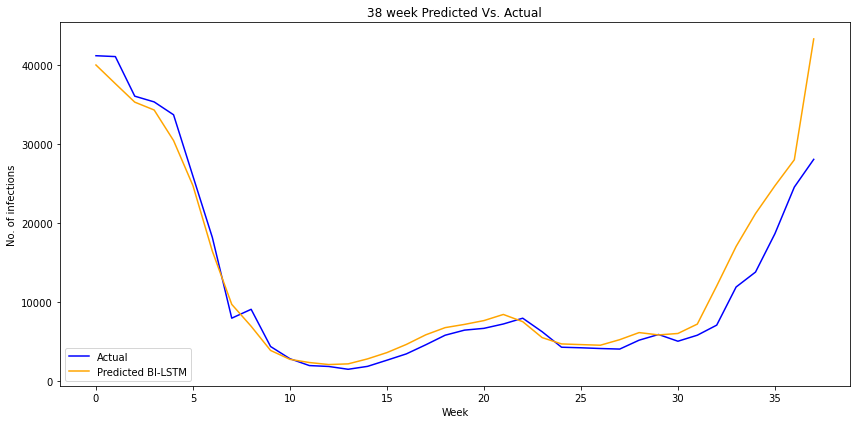

In [130]:
fig, ax = plt.subplots(figsize = (12, 6))
# creating the bar plot
ax.plot(testing_data_38[:-2]*Y_sd_2+Y_mu_2, label='Actual', color ='blue')
ax.plot(y_predict_38*Y_sd_2+Y_mu_2,label='Predicted BI-LSTM', color ='orange')
ax.set_xlabel("Week")
ax.set_ylabel("No. of infections")
ax.set_title("38 week Predicted Vs. Actual")
ax.legend()
fig.tight_layout()
plt.show()  